In [2]:
import pandas as pd
data = pd.read_csv('./Downloads/cleaned_loans_full_schema_loan1.csv')
data.head(5)

emp_title  emp_length  state  homeownership  annual_income  \
0  global config engineer            3     32              1              1   
1   warehouse office clerk          10     13              2              1   
2                 assembly           3     54              2              1   
3         customer service           1     41              2              1   
4     security supervisor           10      5              2              1   

   verified_income  debt_to_income  annual_income_joint  \
0                0           18.01                  0.0   
1                1            5.04                  0.0   
2                2           21.15                  0.0   
3                1           10.16                  0.0   
4                0           57.96              57000.0   

   verification_income_joint  debt_to_income_joint  ...  issue_month  \
0                          0                  0.00  ...       Mar-18   
1                          0                  0.00  ...       Feb-18   
2                          0                  0.00  ...       Feb-18   
3                          0                  0.00  ...       Jan-18   
4                          0                 37.66  ...       Mar-18   

   loan_status  initial_listing_status  disbursement_method   balance  \
0            0                       0                    0  27015.86   
1            0                       0                    0   4651.37   
2            0                       1                    0   1824.63   
3            0                       0                    0  18853.26   
4            0                       0                    0  21430.15   

   paid_total  paid_principal  paid_interest  paid_late_fees  Is_bad_loan  
0     1999.33          984.14        1015.19             0.0            0  
1      499.12          348.63         150.49             0.0            0  
2      281.80          175.37         106.43             0.0            0  
3     3312.89         2746.74         566.15             0.0            0  
4     2324.65         1569.85         754.80             0.0            0  

[5 rows x 56 columns]

In [3]:
drop_col = ['emp_title','annual_income_joint','verification_income_joint','debt_to_income_joint','delinq_2y','num_collections_last_12m','current_accounts_delinq','num_collections_last_12m','current_accounts_delinq','num_accounts_120d_past_due','num_accounts_30d_past_due','tax_liens']
data = data.drop(columns=drop_col)
data.head(5)

emp_length  state  homeownership  annual_income  verified_income  \
0           3     32              1              1                0   
1          10     13              2              1                1   
2           3     54              2              1                2   
3           1     41              2              1                1   
4          10      5              2              1                0   

   debt_to_income  months_since_last_delinq  earliest_credit_line  \
0           18.01                        38                    20   
1            5.04                         0                    25   
2           21.15                        28                    15   
3           10.16                         0                    14   
4           57.96                         0                    13   

   inquiries_last_12m  total_credit_lines  ...  issue_month  loan_status  \
0                   6                  28  ...       Mar-18            0   
1                   1                  30  ...       Feb-18            0   
2                   4                  31  ...       Feb-18            0   
3                   0                   4  ...       Jan-18            0   
4                   7                  22  ...       Mar-18            0   

   initial_listing_status  disbursement_method   balance  paid_total  \
0                       0                    0  27015.86     1999.33   
1                       0                    0   4651.37      499.12   
2                       1                    0   1824.63      281.80   
3                       0                    0  18853.26     3312.89   
4                       0                    0  21430.15     2324.65   

   paid_principal  paid_interest  paid_late_fees  Is_bad_loan  
0          984.14        1015.19             0.0            0  
1          348.63         150.49             0.0            0  
2          175.37         106.43             0.0            0  
3         2746.74         566.15             0.0            0  
4         1569.85         754.80             0.0            0  

[5 rows x 46 columns]

In [4]:
import numpy as np
struct_data = data.copy()

non_numeric_columns = list(struct_data.select_dtypes(exclude=[np.number]).columns)
print(non_numeric_columns)

['grade', 'sub_grade', 'issue_month']


In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in non_numeric_columns:
    struct_data[col] = le.fit_transform(struct_data[col])

struct_data.head(5)

emp_length  state  homeownership  annual_income  verified_income  \
0           3     32              1              1                0   
1          10     13              2              1                1   
2           3     54              2              1                2   
3           1     41              2              1                1   
4          10      5              2              1                0   

   debt_to_income  months_since_last_delinq  earliest_credit_line  \
0           18.01                        38                    20   
1            5.04                         0                    25   
2           21.15                        28                    15   
3           10.16                         0                    14   
4           57.96                         0                    13   

   inquiries_last_12m  total_credit_lines  ...  issue_month  loan_status  \
0                   6                  28  ...            2            0   
1                   1                  30  ...            0            0   
2                   4                  31  ...            0            0   
3                   0                   4  ...            1            0   
4                   7                  22  ...            2            0   

   initial_listing_status  disbursement_method   balance  paid_total  \
0                       0                    0  27015.86     1999.33   
1                       0                    0   4651.37      499.12   
2                       1                    0   1824.63      281.80   
3                       0                    0  18853.26     3312.89   
4                       0                    0  21430.15     2324.65   

   paid_principal  paid_interest  paid_late_fees  Is_bad_loan  
0          984.14        1015.19             0.0            0  
1          348.63         150.49             0.0            0  
2          175.37         106.43             0.0            0  
3         2746.74         566.15             0.0            0  
4         1569.85         754.80             0.0            0  

[5 rows x 46 columns]

In [7]:
from causalnex.structure.notears import from_pandas
sm = from_pandas(struct_data,max_iter=100)

/Applications/anaconda3/envs/myconda/lib/python3.8/site-packages/pygraphviz/agraph.py:1390: RuntimeWarning: Warning: node 'emp_length', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


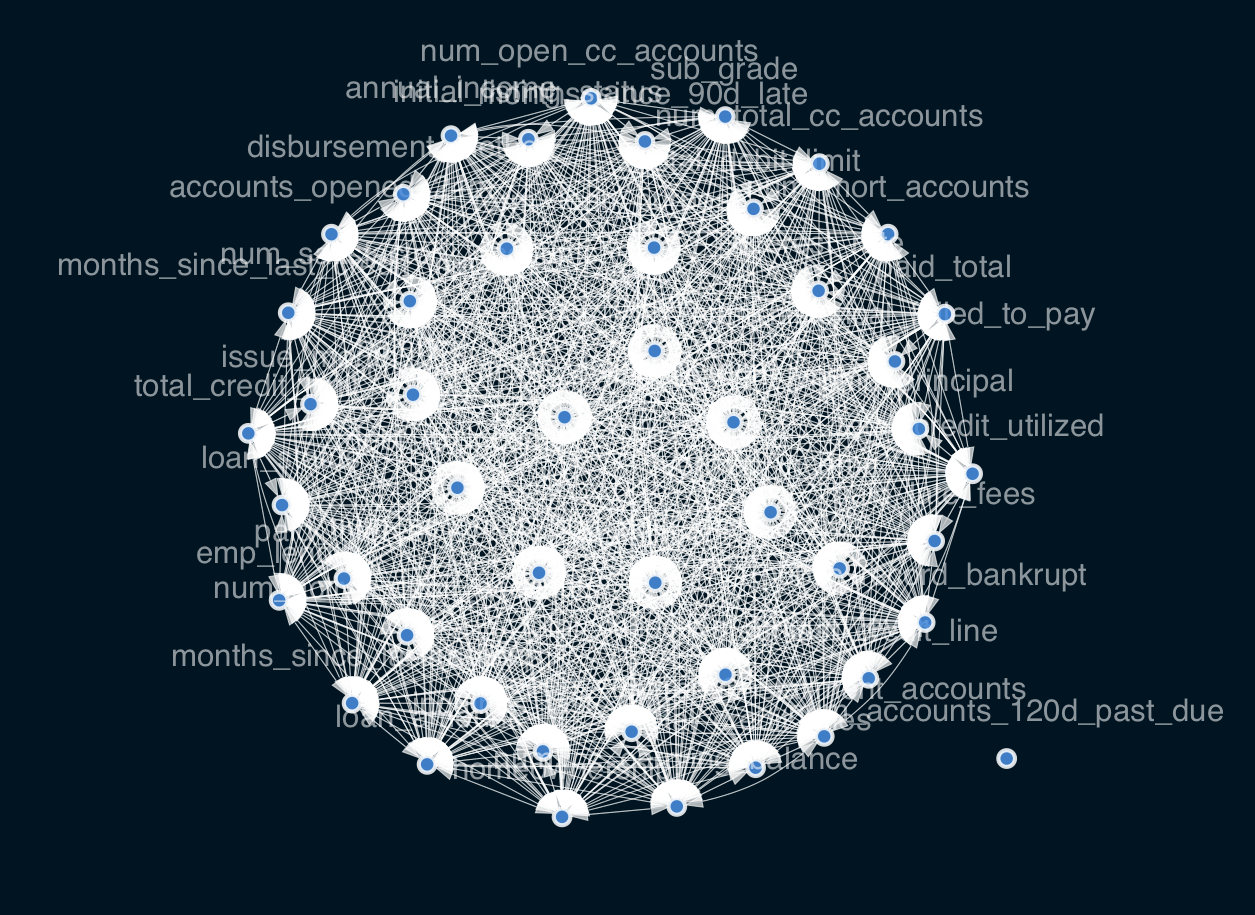

In [8]:
from IPython.display import Image
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE
viz = plot_structure(
    sm,
    graph_attributes={"scale": "0.5"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))

/Applications/anaconda3/envs/myconda/lib/python3.8/site-packages/pygraphviz/agraph.py:1390: RuntimeWarning: Warning: node 'emp_length', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


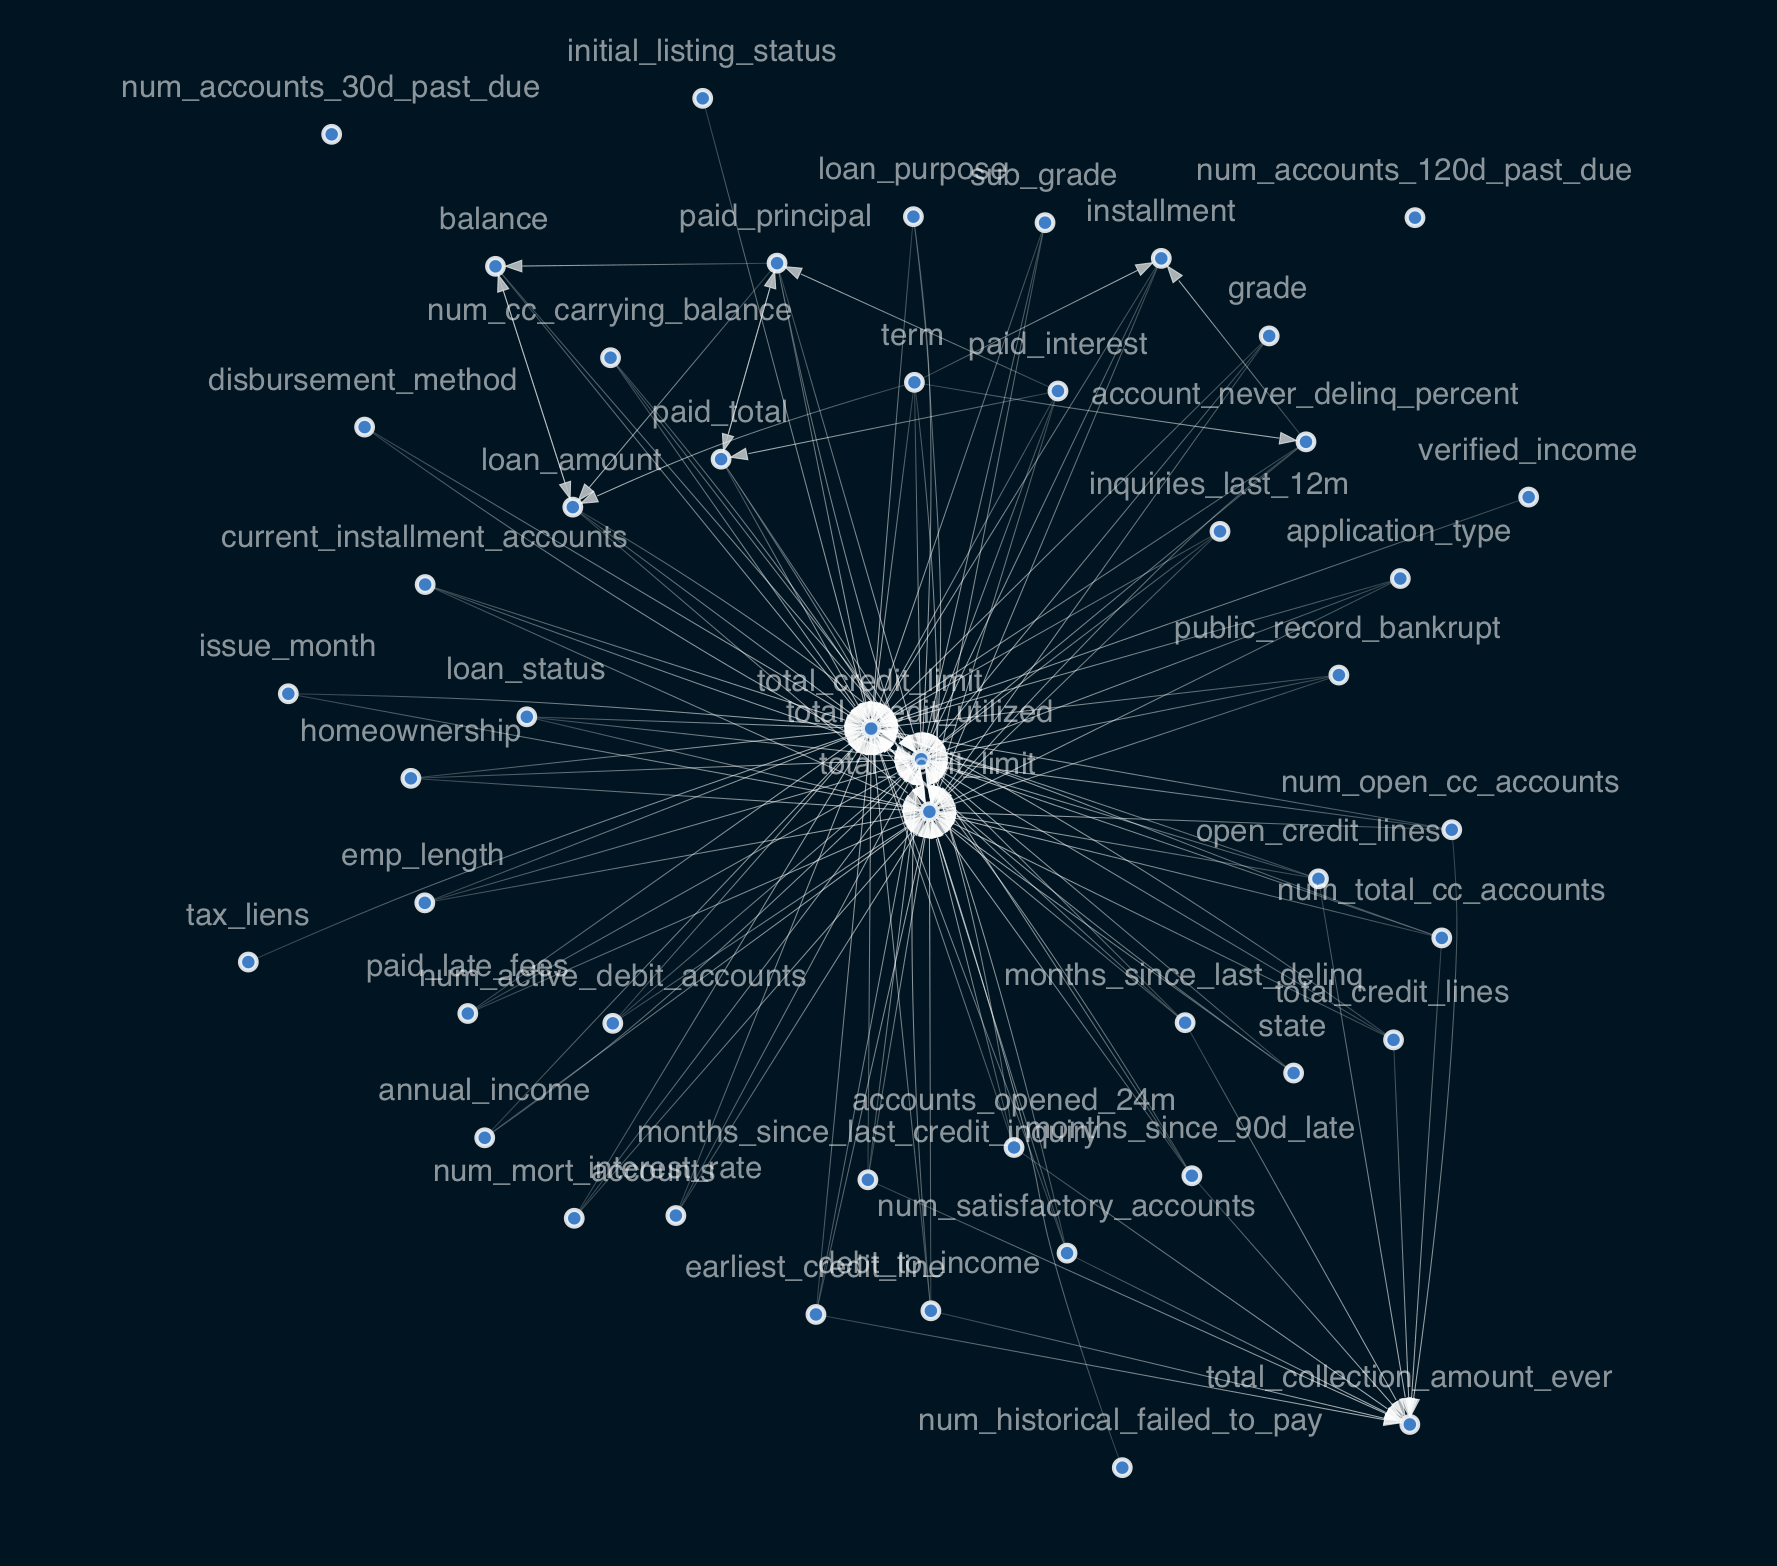

In [9]:
sm.remove_edges_below_threshold(0.8)
viz = plot_structure(
    sm,
    graph_attributes={"scale": "0.5"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))

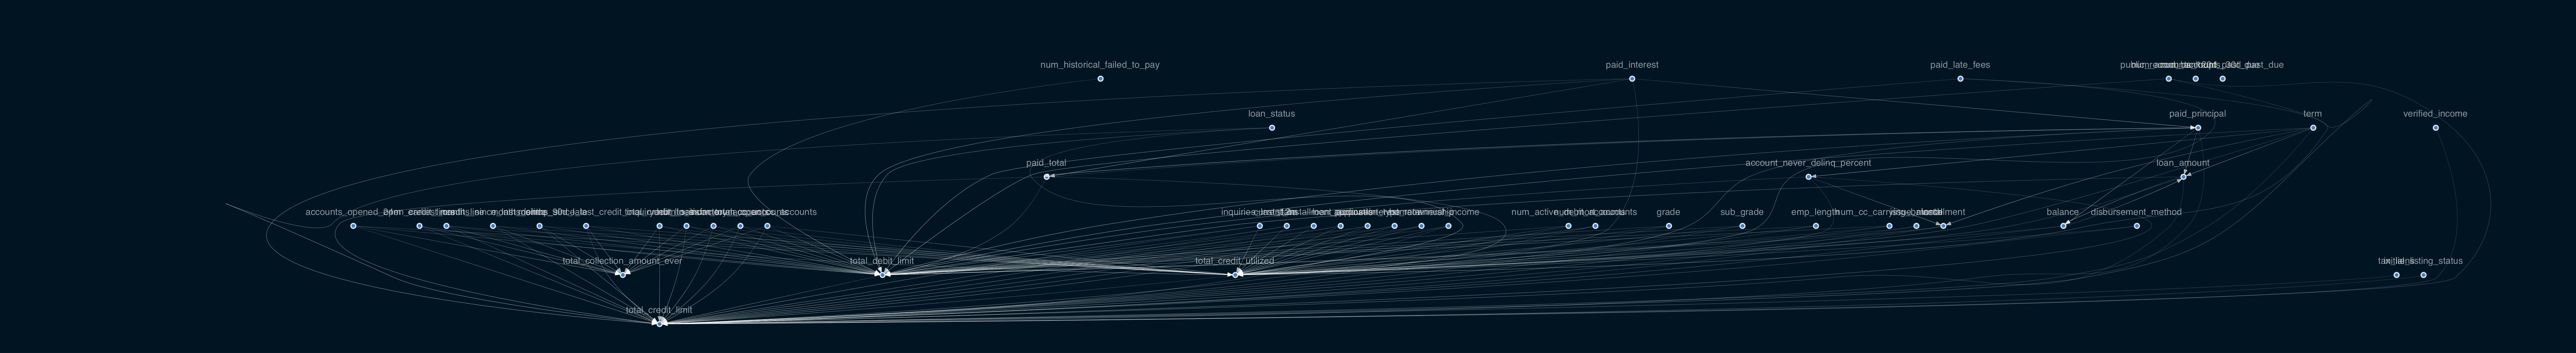

In [10]:
viz = plot_structure(
    sm,
    prog="dot",
    graph_attributes={"scale": "0.5"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))

In [11]:
print(viz.string())

strict digraph "" {
	graph [bb="0,0,1861.7,204",
		bgcolor="#001521",
		dpi=300,
		fontcolor="#FFFFFFD9",
		fontname=Helvetica,
		overlap=scale,
		pad="0.8,0.3",
		scale=0.5,
		splines=True
	];
	node [label="\N"];
	emp_length	 [color="#FFFFFFD9",
		fillcolor="#4a90e2d9",
		fixedsize=True,
		fontcolor="#FFFFFF8c",
		fontname=Helvetica,
		fontsize=10,
		height=0.055556,
		label="emp_length

 ",
		penwidth=1,
		pos="1310.6,82",
		shape=circle,
		style=filled,
		width=0.055556];
	total_credit_limit	 [color="#FFFFFFD9",
		fillcolor="#4a90e2d9",
		fixedsize=True,
		fontcolor="#FFFFFF8c",
		fontname=Helvetica,
		fontsize=10,
		height=0.055556,
		label="total_credit_limit

 ",
		penwidth=1,
		pos="366.61,2",
		shape=circle,
		style=filled,
		width=0.055556];
	emp_length -> total_credit_limit	 [arrowhead=normal,
		arrowsize=0.4,
		color="#ffffff33;0.03:#ffffff36;0.03:#ffffff3a;0.03:#ffffff3e;0.03:#ffffff42;0.03:#ffffff46;0.03:#ffffff4a;0.03:#ffffff4e;0.03:#ffffff52;\
0.03:#ffffff56;0.03:#ffffff